# Automobile Data Analysis

In [784]:
# Import packages.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Classification
from sklearn import tree
from sklearn.tree._export import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Read the data.
colnames = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
            "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
            "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
            "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('./data/automobile_data.data', header=None, names=colnames)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [785]:
# Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Data Preprocessing
In the dataset, the missing values are represented with '?'. Replace the '?' with `NaN`.

In [786]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Convert Data Types
Some features need to be converted to the correct data type.

In [787]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [788]:
# Convert objects to numeric
def to_num(dataframe,colname):
    """
    Convert column of dataframe to numeric type.
    """
    dataframe[colname] = pd.to_numeric(dataframe[colname])
    
to_convert = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for i in to_convert:
    to_num(df,i)

In [789]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Missing Value Imputation

In [790]:
# Which columns have NaNs?
df.isna().sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [791]:
# Make a copy of the original dataset
df_copy = df.copy()

#### Impute numerical features using KNN Imputer

In [792]:
# Extract numeric columns
df_num = df.select_dtypes(include=np.number)
df_copy_num = df_copy.select_dtypes(include=np.number)

# Fit & transform imputer using original dataset
imp_num = KNNImputer(n_neighbors=5, weights="uniform")
imp_num.fit_transform(df_num)

# Replace numeric variables with imputated values in the copied data
df_copy[df_copy_num.columns] = imp_num.transform(df_copy_num)

In [793]:
df_copy.isna().sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Impute categorical features using most frequent values

In [794]:
# Extract categorical columns
df_cat = df.select_dtypes(include='object')
df_copy_cat = df_copy.select_dtypes(include='object')

# Fit & transform imputer using original dataset
imp_cat = SimpleImputer(strategy='most_frequent')
imp_cat.fit_transform(df_cat)

# Replace categorical variables with imputated values in the copied data
df_copy[df_copy_cat.columns] = imp_cat.transform(df_copy_cat)

In [795]:
df_copy.isna().sum(axis=0) # No more missing values!

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Exploratory Data Analysis & Visualizations

#### Scatter Matrix

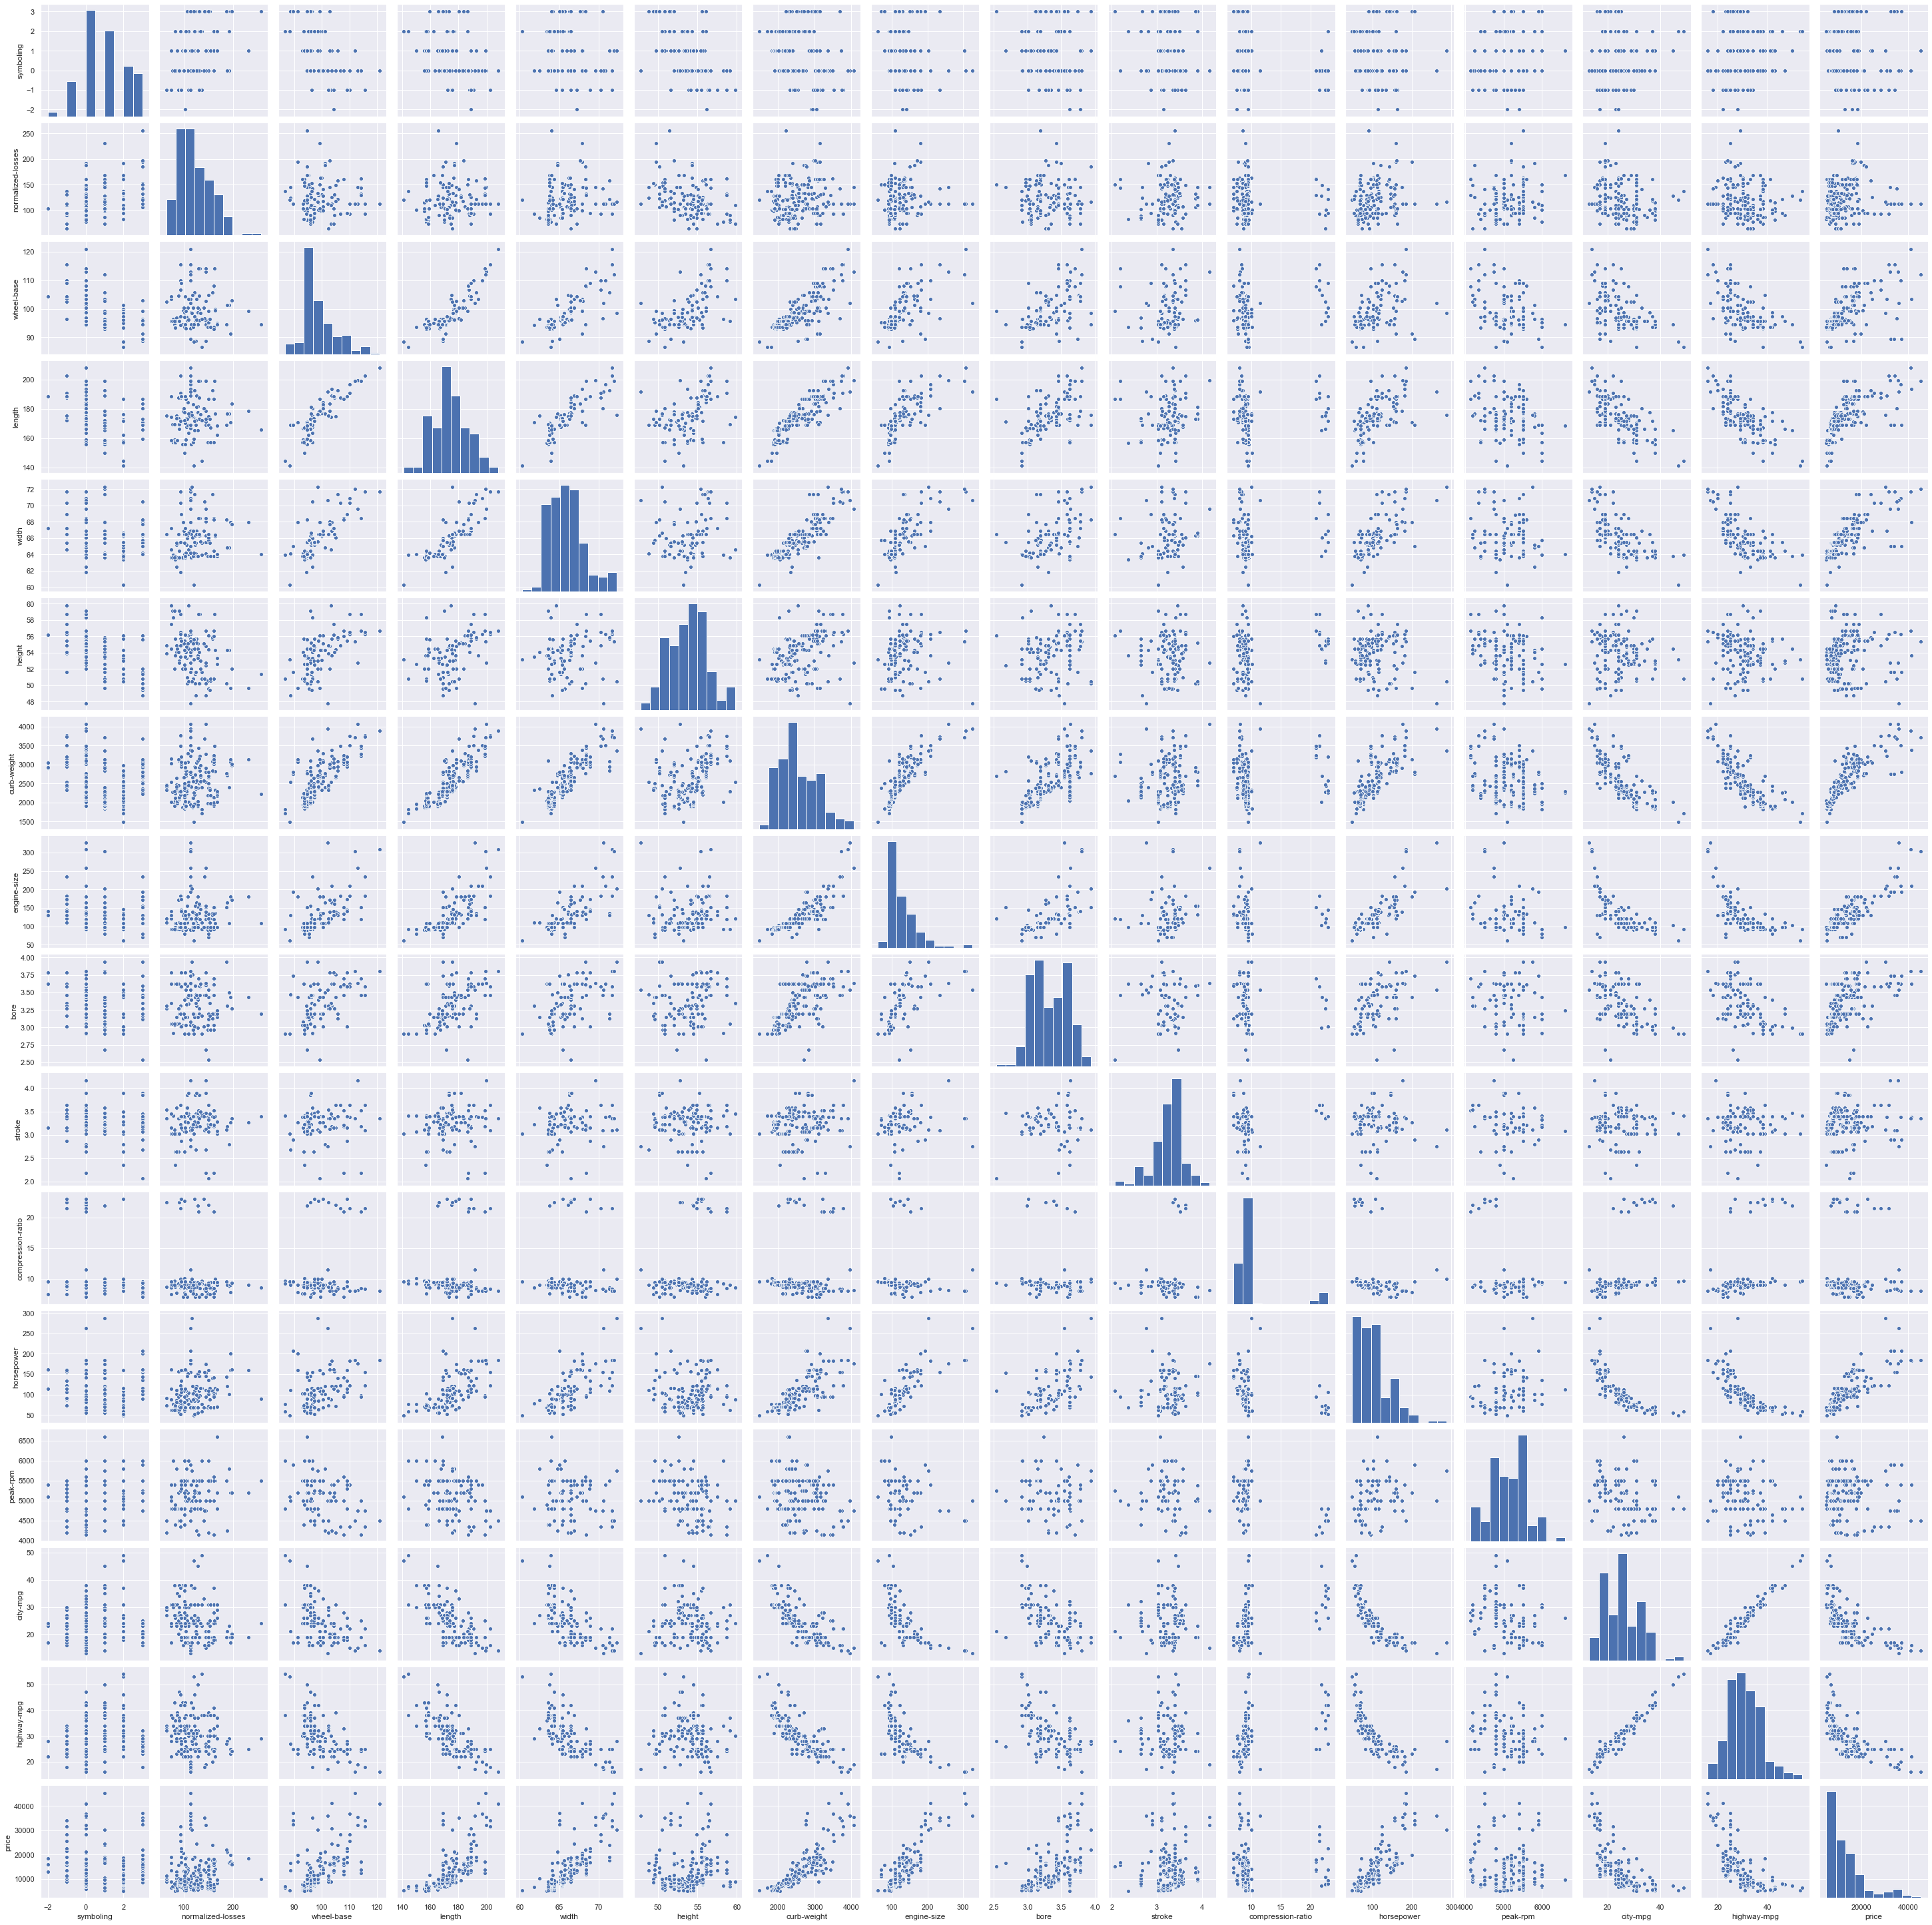

In [797]:
sns.pairplot(df_copy)

#### Histogram of Car Make

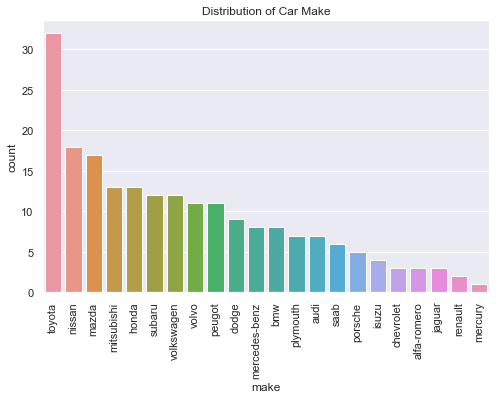

In [798]:
plt.figure(figsize=(8,5))
sns.countplot(x='make', data=df_copy, order = df_copy['make'].value_counts().index)
plt.xticks(rotation='vertical')
plt.title('Distribution of Car Make')
plt.show()

Toyota is represented the most in the dataset and Mercury is represented the least.

#### Normalized Losses by Body Style

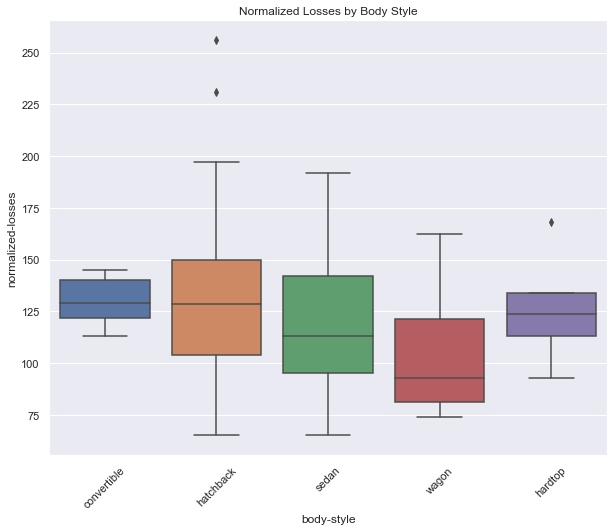

In [799]:
plt.figure(figsize=(10,8))
sns.boxplot(x='body-style', y='normalized-losses', data=df_copy)
plt.xticks(rotation=45)
plt.title('Normalized Losses by Body Style')
plt.show()

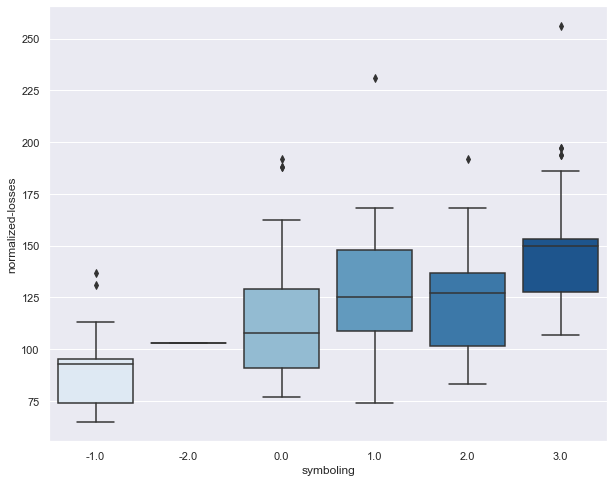

In [1129]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df_copy['symboling'].astype(str),y=df_copy['normalized-losses'], palette='Blues')

#### Distribution of Categorical Variables

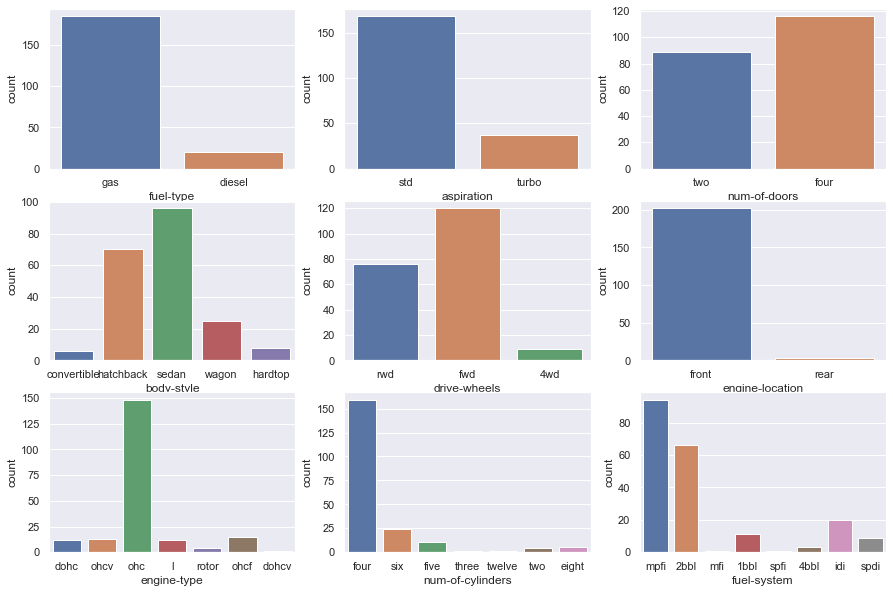

In [802]:
cat = df_copy.select_dtypes(include='object').columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for col, ax in zip(cat[1:], axs.ravel()):
    sns.countplot(x=col, data=df_copy, ax=ax)

Most cars in this dataset run on gas. Most cars have four doors. Most cars are front wheel drive. Most cars have four cylinders.

#### Correlation between Features

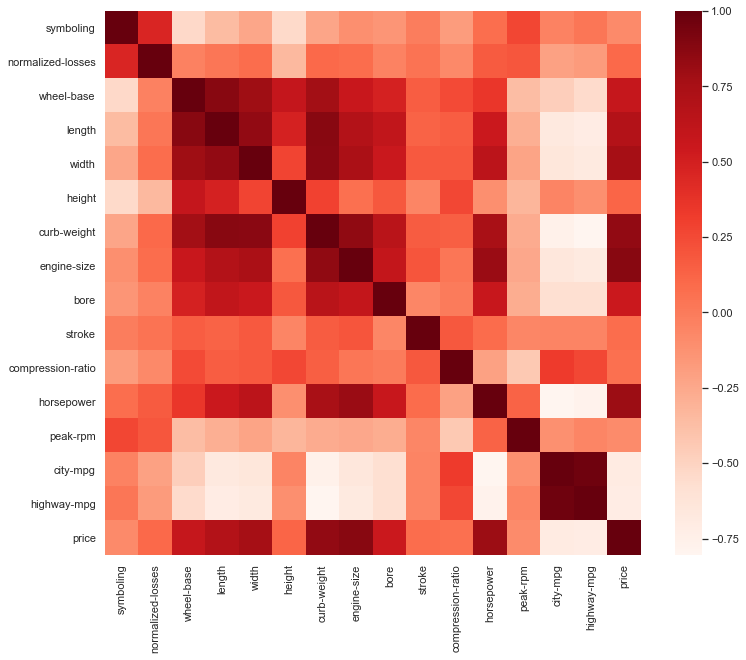

In [1130]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df_copy.corr(),cmap=plt.cm.Reds)

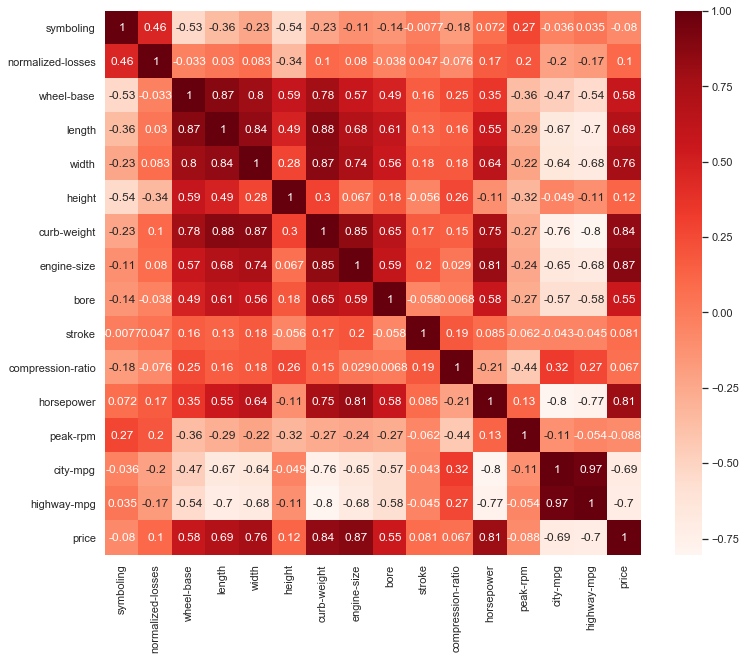

In [960]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df_copy.corr(),annot=True,cmap=plt.cm.Reds)

Wheelbase, length, and width have a high positive correlation. City mpg and highway mpg have a high negative correlation.

The features that have a strong positive correlation with price are wheel base, length, width, curb weight, engine size, bore, and horsepower. The features that have a negative correlation with price are city mpg and highway mpg.

Thus, the features with the largest absolute value of the correlation coefficient are engine size, curb weight, horsepower, length/width, and mpg (city/highway).

#### Linear Regression

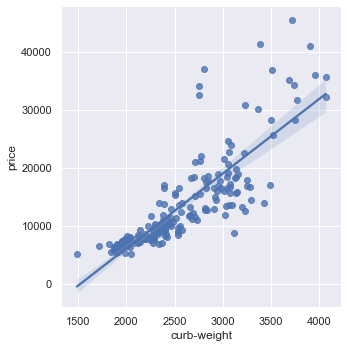

In [22]:
sns.lmplot(x= 'curb-weight' , y='price', data=df_copy)

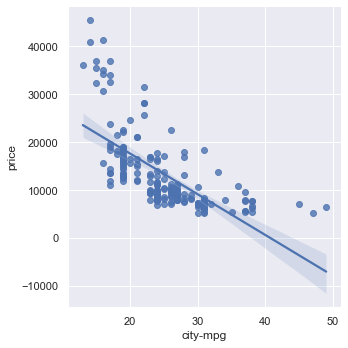

In [23]:
sns.lmplot(x= 'city-mpg' , y='price', data=df)

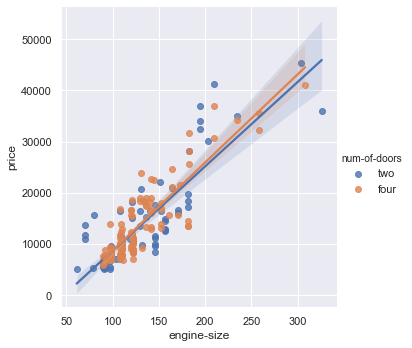

In [24]:
sns.lmplot(x= 'engine-size' , y='price', hue = 'num-of-doors', data=df_copy)

### Prepare data for classification models

#### Label Encoder
Convert categorical variables to numerical variables through Label Encoder.

In [110]:
# le = LabelEncoder()

# df_enc = df_copy.copy()
# for col_name in df_enc.columns:
#     if(df_enc[col_name].dtype == 'object'):
#         df_enc[col_name]= df_enc[col_name].astype('category')
#         df_enc[col_name] = df_enc[col_name].cat.codes
        
# df_enc.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,123.8,0,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,144.8,0,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,144.8,0,1,0,1,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,1,1,0,0,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,1,1,0,0,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


#### One Hot Encoding

In [805]:
enc = OneHotEncoder(handle_unknown='ignore')

df_enc = df_copy.copy()

# Drop 'make' column since it is not a physical attribute of the car
df_enc = df_enc.drop(['make'],axis=1)

# Get column names of categorical and numerical variables
cat_names = df_enc.select_dtypes(include='object').columns
num_names = df_enc.select_dtypes(include=np.number).columns

# Encode categorical variables
enc_columns = pd.get_dummies(df_copy[cat_names], drop_first = True)

# Concatenate encoded columns to numerical columns
df_enc = pd.concat([df_enc[num_names], enc_columns], axis=1)

df_enc.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,123.8,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,144.8,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,144.8,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


## Classification of Safe and Risky Cars
Use the symboling feature to classify cars into safe (symboling is in [-3,0]) or risky (symboling is in [1,3]).

In [806]:
dat = df_enc.copy()

dat['symb_label'] = ''
dat.loc[dat['symboling'] <= 0,'symb_label'] = 'safe'
dat.loc[dat['symboling'] > 0,'symb_label'] = 'risky'
dat = dat.drop('symboling',axis=1)

dat.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,symb_label
0,123.8,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,risky
1,144.8,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,risky
2,144.8,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,...,0,0,0,0,0,0,1,0,0,risky
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,...,0,0,0,0,0,0,1,0,0,risky
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,...,0,0,0,0,0,0,1,0,0,risky


#### Train test split

In [1050]:
X = dat.drop('symb_label',axis=1)
y = dat['symb_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.value_counts(y_train)/len(y_train)

risky    0.573427
safe     0.426573
Name: symb_label, dtype: float64

No need to scale the features since decision tress are fairly insensitive to the scale of the features.

#### Feature selection

In [1051]:
X_copy = X.copy()
np.shape(X_copy)

(205, 44)

In [1052]:
clf = ExtraTreesClassifier(n_estimators=50,random_state=0)
clf = clf.fit(X_copy, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)

mask = model.get_support()
X_new = X_copy.loc[:,mask]
np.shape(X_new)

(205, 18)

#### Train test split with reduced features

In [1105]:
X = X_new.copy()
y = dat['symb_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pd.value_counts(y_train)/len(y_train)

risky    0.573427
safe     0.426573
Name: symb_label, dtype: float64

### Decision Tree

#### Fit default model

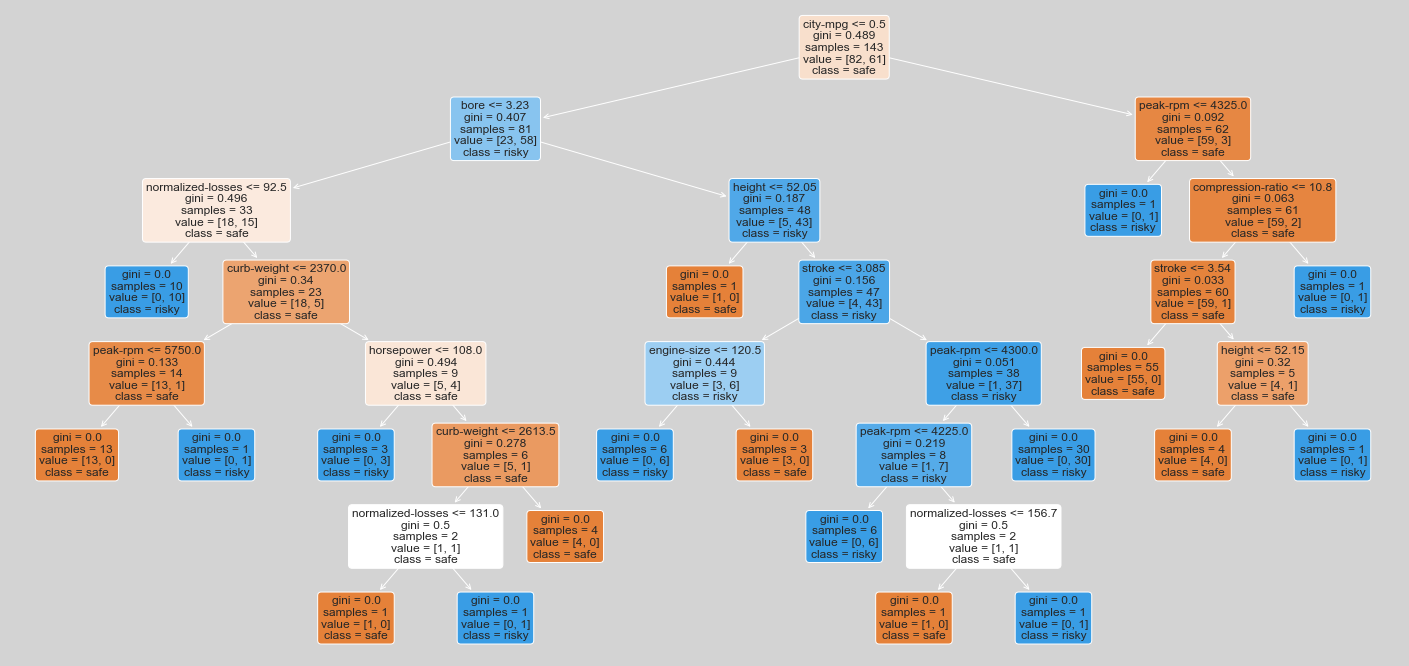

In [1054]:
# Train the model
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

plt.figure(figsize=(25,12), facecolor='lightgray')
tree.plot_tree(clf,filled=True,
               feature_names = X.columns,class_names=['safe','risky'],
               rounded = True,fontsize=12);

In [1101]:
tree_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(tree_cv_score.mean(), tree_cv_score.std())

0.8149999999999998 0.09703688197064576


#### Grid Search

In [1222]:
param_grid=[{'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'max_depth': np.arange(2, 15),
             'max_leaf_nodes': np.arange(2, 20),
             'min_samples_split': np.arange(2, 20)
            }]
clf = tree.DecisionTreeClassifier(random_state=1)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='depre...
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11

In [1219]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_split': 19,
 'splitter': 'best'}

In [1173]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=19,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

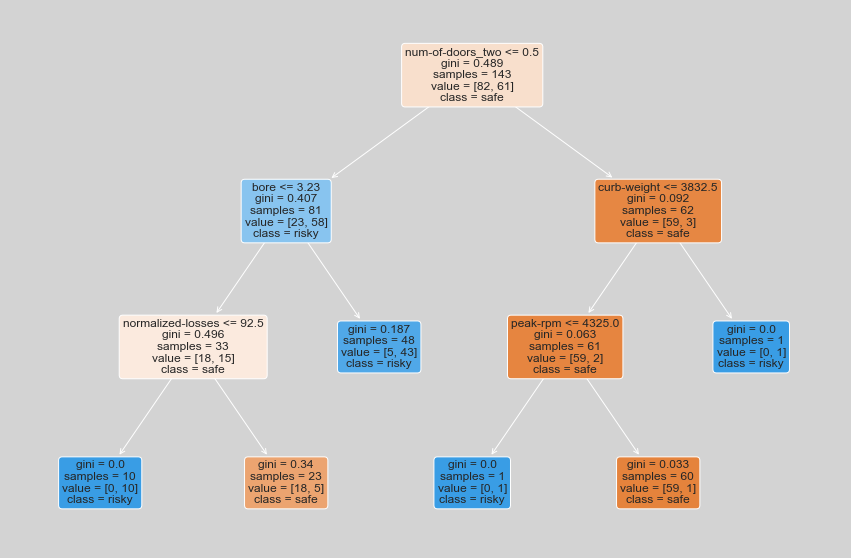

In [1223]:
# Plot the best model
final_model = grid_search.best_estimator_

plt.figure(figsize=(15,10), facecolor='lightgray')
tree.plot_tree(final_model,filled=True,
               feature_names = X.columns,class_names=['safe','risky'],
               rounded = True,fontsize=12);

In [1174]:
grid_search.best_score_

0.8874384236453203

#### Model Evaluation

##### Accuracy Score

In [1176]:
# Classification result in test set
y_pred_final = final_model.predict(X_test)
accuracy_score(y_test, y_pred_final)

0.8870967741935484

In [1224]:
# Cross validated accuracy
cv_score = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Mean CV score : 0.71
Var CV score : 0.13


##### Confusion Matrix

<Figure size 1440x1440 with 0 Axes>

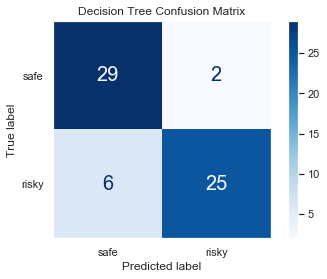

In [1225]:
classifier = final_model.fit(X_train,y_train)
plt.figure(figsize=(20,20))
plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['safe','risky'],
                                 cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Decision Tree Confusion Matrix')
plt.show()

##### Receiver Operating Characteristic (ROC) Curve and AUC

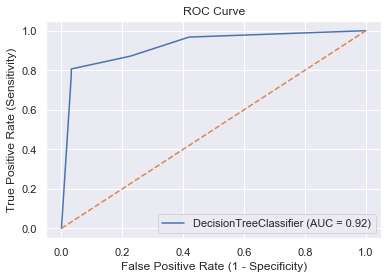

In [1139]:
# ROC Curve
metrics.plot_roc_curve(final_model, X_test, y_test)
plt.plot([0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [1140]:
# ROC AUC
roc_auc_score(y_test, pred_prob)

0.872528616024974

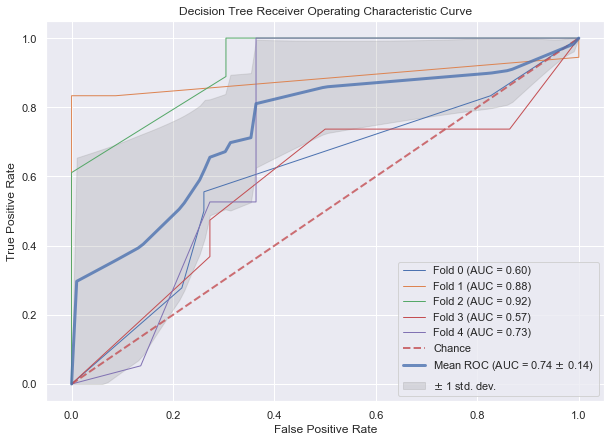

In [1226]:
Xa = np.array(X)

# Plot ROC curves
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10,7))
for i, (train, test) in enumerate(cv.split(Xa, y)):
    final_model.fit(Xa[train], y[train])
    viz = plot_roc_curve(final_model, Xa[test], y[test],
                         name='Fold {}'.format(i),
                         alpha=1, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=3, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Decision Tree Receiver Operating Characteristic Curve")
ax.legend(loc="lower right")
plt.show()

In [1142]:
# Mean AUCs
np.mean(aucs)

0.7938296003513395

In [1143]:
# calculate cross-validated AUC
cross_val_score(final_model, X, y, cv=10, scoring='roc_auc').mean()

0.8440656565656564

##### Precision Recall (PR) Curve

Text(0.5, 1.0, 'Precision-Recall Curve')

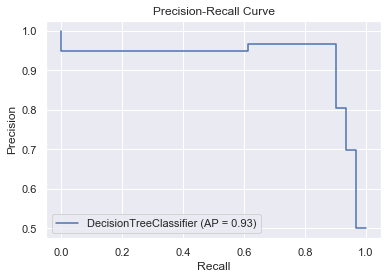

In [1144]:
plot_precision_recall_curve(final_model, X_test, y_test)
plt.title('Precision-Recall Curve')

In [1145]:
# Average precision score
average_precision_score(y_test, pred_prob, pos_label = 'safe')

0.8439750810718551

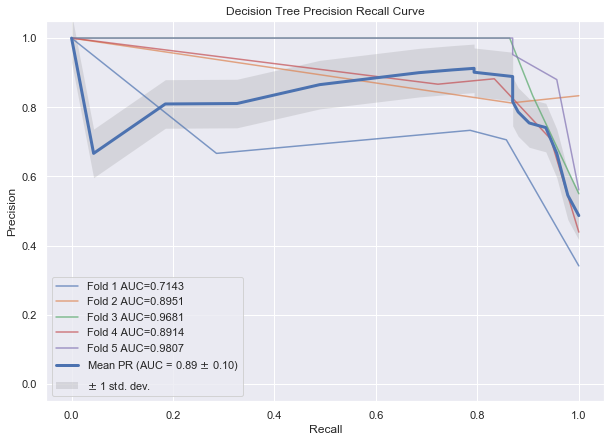

In [1228]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

y_real = []
y_proba = []

precision_array = []
threshold_array = []
recall_array = np.linspace(0, 1, 100)
pr_auc_array = []

fig, ax = plt.subplots(figsize = (10,7))
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = Xa[train_index], Xa[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    final_model.fit(Xtrain, ytrain)
    pred_proba = final_model.predict_proba(Xtest)
    precision_fold, recall_fold, thresh = precision_recall_curve(ytest, pred_proba[:,1], pos_label = 'safe')
    precision_fold, recall_fold, thresh = precision_fold[::-1], recall_fold[::-1], thresh[::-1]  # reverse order of results
    thresh = np.insert(thresh, 0, 1.0)
    precision_array = np.interp(recall_array, recall_fold, precision_fold)
    threshold_array = np.interp(recall_array, recall_fold, thresh)
    pr_auc = auc(recall_array, precision_array)
    pr_auc_array.append(pr_auc)

    lab_fold = 'Fold %d AUC=%.4f' % (i+1, pr_auc)
    plt.plot(recall_fold, precision_fold, alpha=0.7, label=lab_fold)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])
    
mean_precision = np.mean(precision_array)
std_precision = np.std(precision_array)

mean_pr_auc = np.mean(pr_auc_array)
std_pr_auc = np.std(pr_auc_array)

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba, pos_label = 'safe')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
      title="Decision Tree Precision Recall Curve")
plt.plot(recall, precision, lw=3,color='b', 
         label=r'Mean PR (AUC = %0.2f $\pm$ %0.2f)' % (mean_pr_auc, std_pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.fill_between(recall, precision + std_precision, precision - std_precision, alpha=0.2, 
                 linewidth=0, color='grey',label=r'$\pm$ 1 std. dev.')
plt.legend(loc='lower left')
plt.show()

In [1178]:
# Mean AUC
np.mean(pr_auc_array)

0.8837891757873664

### Random Forest

#### Fit model

In [1147]:
# Train the model
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Evaluate model
cv_score = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Mean CV score : 0.80
Var CV score : 0.12


#### Grid search

In [1206]:
param_grid=[{'max_depth': [2,5,10],
             'min_samples_split': [2,5,10],
             'min_samples_leaf': [1,2,5,10],
             'n_estimators': np.arange(2, 20)
            }]
clf = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [1207]:
final_model=grid_search.best_estimator_
final_model.fit(X_train,y_train)
final_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [1208]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 13}

In [1203]:
grid_search.best_score_

0.9226600985221675

#### Feature Importance

In [1199]:
for name, importance in zip(X_train.columns,final_model.feature_importances_):
    print(name, importance)

normalized-losses 0.07794239906996996
wheel-base 0.048899518791066104
length 0.0970005808284846
width 0.06340718944016596
height 0.15686496362439234
curb-weight 0.1099056213284741
engine-size 0.010261398204197966
bore 0.04382171666426846
stroke 0.024670611310951593
compression-ratio 0.004157997345807892
horsepower 0.06292844846580944
peak-rpm 0.04964865759442532
num-of-doors_two 0.17332523881395367
body-style_hatchback 0.0239232810966393
body-style_sedan 0.011019917722266858
body-style_wagon 0.01842454283924947
drive-wheels_fwd 0.013398502331804271
drive-wheels_rwd 0.010399414528072496


In [1152]:
imp_df = pd.DataFrame({'feature':X_train.columns, 'imp':final_model.feature_importances_})
imp_df = imp_df.sort_values(by=['imp'],ascending=False).reset_index(drop=True)

In [1153]:
# 5 most important features
imp_df.head(5)

,feature,imp
0,num-of-doors_two,0.230728
1,width,0.120136
2,height,0.085436
3,peak-rpm,0.085356
4,wheel-base,0.079152


In [1154]:
# 5 least important features
imp_df.tail(5)

,feature,imp
13,compression-ratio,0.022773
14,engine-size,0.012435
15,body-style_wagon,0.000000
16,drive-wheels_fwd,0.000000
17,drive-wheels_rwd,0.000000


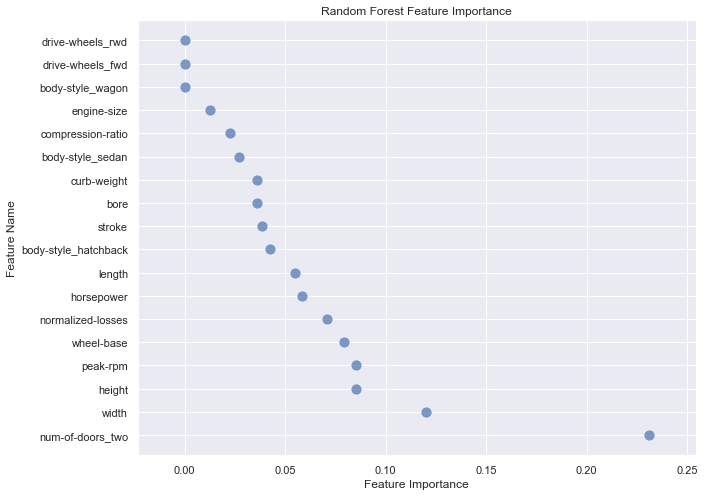

In [1155]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='imp',y='feature',data=imp_df, marker='o', s=120, alpha=0.7)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.show()

#### Model Evaluation

##### Accuracy Score

In [1209]:
# Classification result in test set
y_pred_final = final_model.predict(X_test)
accuracy_score(y_test, y_pred_final)

0.967741935483871

In [1210]:
# Cross validated accuracy
cv_score = cross_val_score(final_model, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Mean CV score : 0.80
Var CV score : 0.11


##### Confusion Matrix

<Figure size 1440x1440 with 0 Axes>

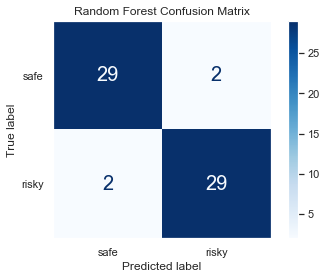

In [1158]:
classifier = final_model.fit(X_train,y_train)
plt.figure(figsize=(20,20))
plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['safe','risky'],
                                 cmap=plt.cm.Blues)
plt.grid(False)
plt.title('Random Forest Confusion Matrix')
plt.show()

##### Receiver Operating Characteristic (ROC) Curve

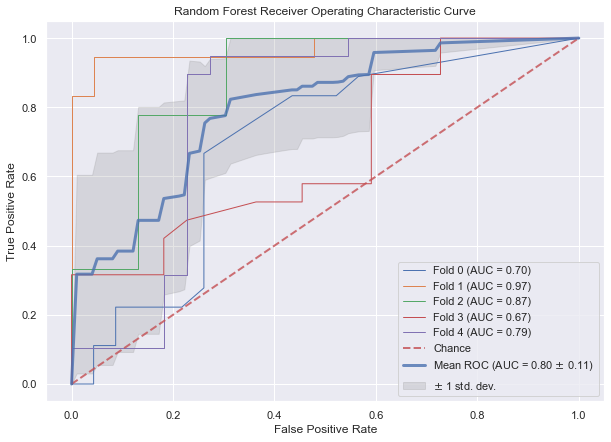

In [1159]:
Xa = np.array(X)

# Plot ROC curves
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize = (10,7))
for i, (train, test) in enumerate(cv.split(Xa, y)):
    final_model.fit(Xa[train], y[train])
    viz = plot_roc_curve(final_model, Xa[test], y[test],
                         name='Fold {}'.format(i),
                         alpha=1, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=3, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Random Forest Receiver Operating Characteristic Curve")
ax.legend(loc="lower right")
plt.show()

In [1160]:
# Mean AUCs
np.mean(aucs)

0.7986385595081247

In [1161]:
# calculate cross-validated AUC
cross_val_score(final_model, X, y, cv=10, scoring='roc_auc').mean()

0.8734680134680135

##### Precision Recall (PR) Curve

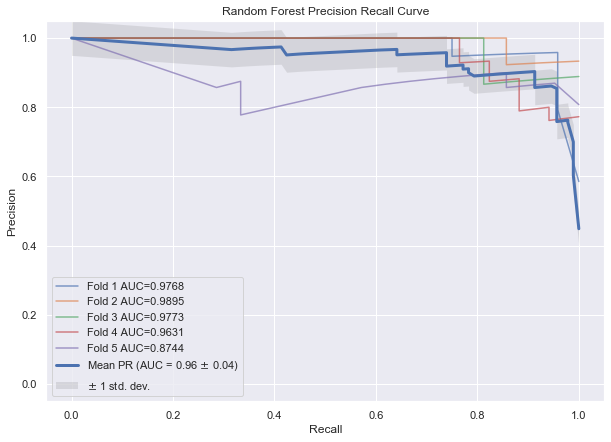

In [1185]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

y_real = []
y_proba = []

precision_array = []
threshold_array = []
recall_array = np.linspace(0, 1, 100)
pr_auc_array = []

fig, ax = plt.subplots(figsize = (10,7))
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = Xa[train_index], Xa[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    final_model.fit(Xtrain, ytrain)
    pred_proba = final_model.predict_proba(Xtest)
    precision_fold, recall_fold, thresh = precision_recall_curve(ytest, pred_proba[:,1], pos_label = 'safe')
    precision_fold, recall_fold, thresh = precision_fold[::-1], recall_fold[::-1], thresh[::-1]  # reverse order of results
    thresh = np.insert(thresh, 0, 1.0)
    precision_array = np.interp(recall_array, recall_fold, precision_fold)
    threshold_array = np.interp(recall_array, recall_fold, thresh)
    pr_auc = auc(recall_array, precision_array)
    pr_auc_array.append(pr_auc)

    lab_fold = 'Fold %d AUC=%.4f' % (i+1, pr_auc)
    plt.plot(recall_fold, precision_fold, alpha=0.7, label=lab_fold)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])
    
mean_precision = np.mean(precision_array)
std_precision = np.std(precision_array)

mean_pr_auc = np.mean(pr_auc_array)
std_pr_auc = np.std(pr_auc_array)

y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba, pos_label = 'safe')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
      title="Random Forest Precision Recall Curve")
plt.plot(recall, precision, lw=3,color='b', 
         label=r'Mean PR (AUC = %0.2f $\pm$ %0.2f)' % (mean_pr_auc, std_pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.fill_between(recall, precision + std_precision, precision - std_precision, alpha=0.2, 
                 linewidth=0, color='grey',label=r'$\pm$ 1 std. dev.')
plt.legend(loc='lower left')
plt.show()

### Adaboosting

In [1163]:
# Adaboosting
ada = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),n_estimators=20)
cv_score = cross_val_score(ada, X, y, cv=5, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Mean CV score : 0.76
Var CV score : 0.12


### XGBoost

In [1164]:
# XGBoost 
xgb = XGBClassifier(max_depth=1, learning_rate=1, n_estimators=30)
cv_score=cross_val_score(xgb, X, y, cv=50, scoring='accuracy')
print('Mean CV score : {:.2f}'.format(cv_score.mean()))
print('Var CV score : {:.2f}'.format(cv_score.std()))

Mean CV score : 0.92
Var CV score : 0.15
